<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/lectures/machine_learning/011_concepts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conceptos Básicos ML

## Representación de Datos

Una tabla es una cuadrícula de datos organizada en filas y columnas. Las filas corresponden a elementos individuales del conjunto, mientras que las columnas representan atributos o características de estos elementos.

Por ejemplo, el conjunto de datos **Iris**, estudiado por **Ronald Fisher** en 1936, utiliza esta estructura para mostrar las características de diferentes especies de flores.

**Descripción de los columnas**

- **sepal_length**: Longitud del sépalo en centímetros.
- **sepal_width**: Ancho del sépalo en centímetros.
- **petal_length**: Longitud del pétalo en centímetros.
- **petal_width**: Ancho del pétalo en centímetros.
- **species**: Especie de la flor (setosa, versicolor, virginica).

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Aquí, cada fila representa una flor observada, y el número total de filas corresponde a la cantidad de flores en el conjunto de datos, denominado `n_samples`. Las filas se conocen como muestras (*samples*). 

De manera similar, cada columna proporciona información específica sobre cada muestra, llamada característica (*feature*). El número total de columnas se denomina `n_features`.

### Matriz de características y Arreglo de Etiquetas 

<img src="https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/figures/05.02-samples-features.png"  align="center"  />


#### Matriz de Características 

La **matriz de características** es la representación de los datos de entrada en un problema de aprendizaje automático. Se trata de una matriz bidimensional con forma `[n_samples, n_features]`, donde las filas representan muestras y las columnas las características o atributos que describen cada muestra. 

Las características suelen ser valores cuantitativos, aunque pueden ser booleanos o discretos. Por convención, esta matriz se almacena en una variable llamada `X`.

In [2]:
# features matrix
X = iris.drop('species',axis=1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#### Arreglo de Etiquetas

Además de la matriz de características `X`, trabajamos con un **arreglo de etiquetas** (`target array`), comúnmente llamado `y`. Este arreglo es unidimensional y tiene una longitud igual a `n_samples`, almacenando los valores objetivo para cada muestra. Los valores pueden ser numéricos continuos o clases discretas. 

Aunque algunos estimadores de Scikit-Learn permiten una matriz bidimensional `[n_samples, n_targets]`, generalmente nos enfocamos en el caso más común de un arreglo unidimensional.

In [3]:
# target
y = iris['species']
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

### Conjunto de Entrenamiento y Prueba

El **conjunto de entrenamiento** (train set) y el **conjunto de prueba** (test set) son dos subconjuntos de datos utilizados en aprendizaje automático. 

El primero se usa para entrenar el modelo, mientras que el segundo se reserva para evaluar su rendimiento y capacidad de generalización.


<img src="https://media.licdn.com/dms/image/D4D12AQGDGMjsrzigDg/article-cover_image-shrink_600_2000/0/1674057624735?e=2147483647&v=beta&t=tVSJ36hIjz7sFWVEDRQuvBZxAtFu5JnlCiDpvIuDGI4" width = "600"  align="center"  />


- El **conjunto de entrenamiento** es un subconjunto de datos utilizado para ajustar los parámetros del modelo y aprender la relación entre las variables de entrada y la salida. En esencia, sirve para entrenar al modelo.

- El **conjunto de prueba** es otro subconjunto, separado del proceso de entrenamiento, empleado para evaluar el rendimiento del modelo. Permite medir su capacidad de generalización al enfrentarlo a datos nuevos y no vistos previamente.

La función `train_test_split` de Scikit-learn es una herramienta esencial para dividir un conjunto de datos en subconjuntos de entrenamiento y prueba. Permite especificar la proporción de datos para cada conjunto, siendo 75% para entrenamiento y 25% para prueba de forma predeterminada. Además, toma como entrada tanto los datos como las etiquetas correspondientes. 



Aquí un ejemplo de cómo utilizarla:

In [7]:
from sklearn.model_selection import train_test_split

# separar informacion
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=42)

La función `train_test_split(X, y, test_size=0.25, random_state=42)` divide los datos en un conjunto de entrenamiento y otro de prueba. 

- `X` son los datos de entrada y `y` las etiquetas.
- `test_size=0.25` asigna el 25% de los datos al conjunto de prueba y el 75% al de entrenamiento.
- `random_state=42` asegura que la división sea reproducible, generando los mismos subconjuntos cada vez que se ejecuta el código.


In [8]:
print(f"dimensiones de X_train: {X_train.shape}")
print(f"dimensiones de y_train: {y_train.shape}")
print("")
print(f"dimensiones de X_test:   {X_test.shape}")
print(f"dimensiones de y_test:   {y_test.shape}")

dimensiones de X_train: (112, 4)
dimensiones de y_train: (112,)

dimensiones de X_test:   (38, 4)
dimensiones de y_test:   (38,)


**Reglas de separación**

En general, los datos se dividen en conjuntos de entrenamiento y prueba. El tamaño de cada conjunto puede variar según el número de filas y la complejidad del modelo. Por lo general, el conjunto de entrenamiento ocupa entre el 70% y el 80%, mientras que el de prueba ocupa entre el 20% y el 30%. 

Aquí hay una referencia sugerida:

| Número de filas      | Conjunto de entrenamiento | Conjunto de prueba |
|----------------------|---------------------------|--------------------|
| 100 - 1,000          | 70%                       | 30%                |
| 1,000 - 100,000      | 80%                       | 20%                |
| Más de 100,000       | 90%                       | 10%                |

## Error de Estimación

El **error de estimación** es la diferencia entre los valores reales y los valores predichos por un modelo. En aprendizaje automático, se refiere a la discrepancia entre la variable objetivo (dependiente) y la predicción del modelo. El objetivo principal es **minimizar este error** para mejorar la precisión en las predicciones.

El cálculo del error de estimación depende del tipo de datos en la variable objetivo:
- **Numéricos**: Se utilizan métricas como el Error Cuadrático Medio (MSE) o el Error Absoluto Medio (MAE).
- **Categóricos**: Se aplican métricas como la precisión o el F1-score.

<img src="https://images.ctfassets.net/dkgr2j75jrom/A6Xf1MfISZhiQWuyGFDpV/708d5fd82c14d8db6eb0d4af1c27d525/PillarPage-Qual-Quan-3.svg" width = "600"  align="center"  />

### Error de Estimación: Datos Numéricos

Para datos numéricos, el **error de estimación** se calcula como la diferencia entre el valor real y el valor predicho por el modelo. Este error se expresa matemáticamente como:


$$\text{Error} = \text{Valor real} - \text{Valor predicho}$$

El objetivo es minimizar esta diferencia. Las métricas comunes para evaluar este error incluyen:

- **Error Absoluto Medio (MAE)**: Promedio de los valores absolutos de las diferencias.
- **Error Cuadrático Medio (MSE)**: Promedio de los cuadrados de las diferencias, sensible a valores atípicos.
- **Raíz del Error Cuadrático Medio (RMSE)**: Raíz cuadrada del MSE, proporcionando una métrica en las mismas unidades que los datos. 

Estas métricas permiten evaluar la precisión del modelo y ajustar sus parámetros para mejorar las predicciones.


<img src="https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/docs/lectures/ml/analisis_supervisado_regresion/images/error.png" width="480" height="360" align="rigt"/>


Vamos a ilustrarlo con un ejemplo práctico:

El código crea un conjunto de datos de ejemplo utilizando números consecutivos (`x`) y valores calculados (`y_real` y `y_pred`). `y_real` es una función lineal de `x`, mientras que `y_pred` introduce variación aleatoria para simular diferencias de predicción. Los datos se organizan en un DataFrame de pandas y se muestran las primeras filas para su revisión.

In [9]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar semilla para reproducibilidad
np.random.seed(42)

# Crear un conjunto de datos de ejemplo
n = 50
x = np.arange(1, n + 1)
y_real = 2 * x  
y_pred = 2 * x + 2 * np.random.randn(n)  # Introducir variación aleatoria

# Crear DataFrame
df = pd.DataFrame({
    'x': x,
    'y_real': y_real,
    'y_pred': y_pred
})

# Mostrar las primeras filas del DataFrame
df.head()

,x,y_real,y_pred
0,1,2,2.993428
1,2,4,3.723471
2,3,6,7.295377
3,4,8,11.046060
4,5,10,9.531693


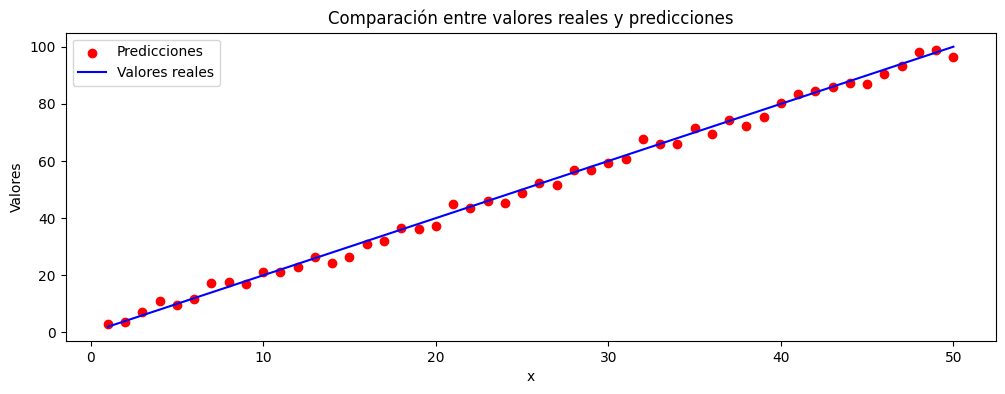

In [10]:
# Visualizar los resultados
plt.figure(figsize=(12, 4))
plt.scatter(df['x'], df['y_pred'], color='red', label='Predicciones')
plt.plot(df['x'], df['y_real'], color='blue', label='Valores reales')
plt.xlabel('x')
plt.ylabel('Valores')
plt.title('Comparación entre valores reales y predicciones')
plt.legend()
plt.show()

La línea azul muestra los valores originales, mientras que los puntos rojos representan las predicciones del modelo. 

A continuación, analizaremos el error de estimación entre los valores originales ($y$) y los valores estimados ($\hat{y}$):

In [11]:
# Calcular el error de estimación
y_original = df['y_real'].values
y_estimado = df['y_pred'].values

error_estimacion = y_original - y_estimado
error_estimacion

array([-0.99342831,  0.2765286 , -1.29537708, -3.04605971,  0.46830675,
        0.46827391, -3.15842563, -1.53486946,  0.93894877, -1.08512009,
        0.92683539,  0.93145951, -0.48392454,  3.82656049,  3.44983567,
        1.12457506,  2.02566224, -0.62849467,  1.81604815,  2.8246074 ,
       -2.93129754,  0.4515526 , -0.13505641,  2.84949637,  1.08876545,
       -0.22184518,  2.30198715, -0.75139604,  1.20127738,  0.5833875 ,
        1.20341322, -3.70455637,  0.02699445,  2.11542186, -1.64508982,
        2.4416873 , -0.41772719,  3.91934025,  2.6563721 , -0.39372247,
       -1.47693316, -0.34273656,  0.23129656,  0.60220739,  2.95704398,
        1.43968842,  0.92127754, -2.11424445, -0.68723658,  3.52608031])

Este resultado nos muestra el **error de estimación** para cada muestra (o fila). Para resumir este error, utilizamos **métricas de evaluación**, que se dividen en dos categorías principales:


1. **Métricas absolutas**: Las métricas absolutas o no escalada miden el error sin escalar los valores. Las métrica absolutas más ocupadas son:

    *  **Mean Absolute Error** (MAE)

    $$\textrm{MAE}(y,\hat{y}) = \dfrac{1}{n}\sum_{t=1}^{n}\left | y_{t}-\hat{y}_{t}\right |$$

    *  **Root Mean Squared Error** (RMSE):

    $$\textrm{RMSE}(y,\hat{y}) =(\dfrac{1}{n}\sum_{t=1}^{n}\left ( y_{t}-\hat{y}_{t}\right )^2)^{1/2}$$

2. **Métricas Porcentuales**: Las métricas porcentuales o escaladas miden el error de manera escalada, es decir, se busca acotar el error entre valores de 0 a 1, donde 0 significa que el ajuste es perfecto, mientras que 1 sería un mal ajuste. Cabe destacar que muchas veces las métricas porcentuales puden tener valores mayores a 1.Las métrica Porcentuales más ocupadas son:

    * **Mean absolute percentage error** (MAPE):
    
    $$\textrm{MAPE}(y,\hat{y}) = \dfrac{1}{n}\sum_{t=1}^{n}\left | \frac{y_{t}-\hat{y}_{t}}{y_{t}} \right |$$

    
Veamos un ejemplo práctico, las métricas de estimación  las podemos obtener desde `sklearn.metrics`:



In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Calcular las métricas de error
mae = mean_absolute_error(y_original, y_estimado)
rmse = mean_squared_error(y_original, y_estimado)  
mape = mean_absolute_percentage_error(y_original, y_estimado)

# Mostrar los resultados
print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}")

MAE:  1.5328
RMSE: 3.6206
MAPE: 0.0586


El código calcula tres métricas de error para evaluar la precisión de un modelo de predicción: 

- `MAE` (Error Absoluto Medio): promedio de los errores absolutos.
- `RMSE` (Raíz del Error Cuadrático Medio): mide el error con sensibilidad a valores extremos.
- `MAPE` (Error Absoluto Porcentual Medio): calcula el error relativo en porcentaje.

Luego, imprime estos valores con cuatro decimales para una mejor interpretación de los resultados.

**¿Cómo identificar la mejor estimación entre dos modelos?**

Si tenemos dos estimaciones, $\hat{y}_{1}$ y $\hat{y}_{2}$, la mejor será aquella que tenga el menor error según las **métricas de evaluación** (como MAE, RMSE o MAPE). 

Ahora, definamos una segunda estimación ($\hat{y}_{2}$) y comparemos ambas utilizando estas métricas para determinar cuál ofrece un mejor ajuste.

In [15]:
# Definir una nueva estimación
y_estimado_2 = y_estimado + np.random.randn(n)

# Calcular el error de la segunda estimación
mae_2 = mean_absolute_error(y_original, y_estimado_2)
rmse_2 = mean_squared_error(y_original, y_estimado_2)  
mape_2 = mean_absolute_percentage_error(y_original, y_estimado_2)

# Mostrar los resultados
print(f"MAE (segunda estimación):  {mae_2:.4f}")
print(f"RMSE (segunda estimación): {rmse_2:.4f}")
print(f"MAPE (segunda estimación): {mape_2:.4f}")


MAE (segunda estimación):  1.8174
RMSE (segunda estimación): 4.7062
MAPE (segunda estimación): 0.0671


Al analizar las métricas de ambas estimaciones, encontramos los siguientes valores:

- **Primera estimación ($\hat{y}_{1}$):** 
  - MAE: 1.5328
  - RMSE: 3.6206
  - MAPE: 0.0586

- **Segunda estimación ($\hat{y}_{2}$):**
  - MAE: 1.8174
  - RMSE: 4.7062
  - MAPE: 0.0671

En este caso, todas las métricas (MAE, RMSE, MAPE) para la primera estimación son menores que las de la segunda. Por lo tanto, la primera estimación ($\hat{y}_{1}$) se considera más precisa y efectiva que la segunda ($\hat{y}_{2}$).

### Error de Estimación: Datos Categóricos

Para calcular el **error de estimación** en datos categóricos, primero es importante comprender conceptos como la **matriz de confusión**. Por ejemplo, si los valores de $y$ representan categorías como "alto" y "bajo", a menudo se convierten en números enteros (por ejemplo, "alto" = 1, "bajo" = 0). Luego, se cuenta cuántas veces la predicción ($\hat{y}$) coincide con el valor real ($y$).

![Matriz de Confusión](https://www.researchgate.net/publication/335080302/figure/fig1/AS:790214687600646@1565413271171/Classification-error-calculation.png)

A continuación, veamos un ejemplo práctico para un problema de **clasificación binaria**.

In [18]:
import pandas as pd
import numpy as np

# Datos reales (50 valores) y predicciones cercanas a 80% de precisión
y_real = [1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
          1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
          0, 1, 1, 0, 0, 1, 0, 1, 1, 0]

# Generar predicciones con aproximadamente un 80% de precisión
y_pred = [1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
          1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
          0, 1, 1, 0, 0, 1, 0, 1, 1, 0]

# Crear un DataFrame con los valores reales y estimados
df = pd.DataFrame({
    'y_real': y_real,
    'y_pred': y_pred
})

# Agregar una columna para indicar coincidencias entre las predicciones y los valores reales
df['coincidencia'] = df['y_real'] == df['y_pred']



# Mostrar los resultados
df.head()


,y_real,y_pred,coincidencia
0,1,1,True
1,0,0,True
2,1,1,True
3,1,1,True
4,0,0,True


En este caso, la columna **coincidencia** indica los casos en los que $y_{i}$ y $\hat{y}_{i}$ son iguales.

In [19]:
# total de coincidencias
df['coincidencia'].value_counts()

coincidencia
True     46
False     4
Name: count, dtype: int64

El resultado muestra que de las 50 predicciones realizadas:

- **46** son **True**, lo que significa que en estos casos las predicciones ($\hat{y}_{i}$) coinciden con los valores reales ($y_{i}$).
- **4** son **False**, lo que indica que en estos casos las predicciones no coinciden con los valores reales.

Esto refleja una alta precisión del modelo, ya que la mayoría de las predicciones son correctas (46 de 50).

**Matriz de Confusión**

La **matriz de confusión** es una herramienta fundamental para evaluar el rendimiento de un modelo de clasificación. Proporciona una representación visual que resume las predicciones realizadas por el modelo y las compara con los valores reales.

Para la clasificación binaria (por ejemplo, clases 0 y 1), la matriz de confusión tiene la siguiente estructura:

<img src="https://live.staticflickr.com/65535/48051372813_0e6a4a0806_b.jpg" width="700" align="center"/>

Aquí se definen los componentes:

- **TP (Verdadero Positivo)**: El modelo predijo correctamente la clase positiva.
- **FP (Falso Positivo)**: El modelo predijo incorrectamente la clase positiva cuando era realmente negativa.
- **FN (Falso Negativo)**: El modelo predijo incorrectamente la clase negativa cuando era realmente positiva.
- **TN (Verdadero Negativo)**: El modelo predijo correctamente la clase negativa.

En resumen, **TP** y **TN** representan las predicciones correctas, mientras que **FP** y **FN** indican los errores de clasificación del modelo.

La siguiente imagen ilustra estos conceptos de **FN** y **FP**:

<img src="https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/docs/lectures/ml/analisis_supervisado_clasificacion/images/error.jpg" width="600"  align="center"/>

Ahora, vamos a calcular la matriz de confusión utilizando el comando `confusion_matrix`:

In [20]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(df['y_real'], df['y_pred'])

# Mostrar la matriz de confusión de forma clara
print('\nMatriz de Confusión:\n')
print(cm)



Matriz de Confusión:

[[20  3]
 [ 1 26]]


**Métricas de Evaluación**

En el contexto de clasificación, el objetivo es maximizar la cantidad de **TP** (Verdaderos Positivos) y **TN** (Verdaderos Negativos) y minimizar los **FP** (Falsos Positivos) y **FN** (Falsos Negativos). Para evaluar el rendimiento del modelo, se utilizan las siguientes métricas:

1. **Accuracy (Precisión Global)**:
   - Mide la proporción de predicciones correctas (positivas y negativas) sobre el total de casos.
   
   $$accuracy(y,\hat{y}) = \dfrac{TP+TN}{TP+TN+FP+FN}$$

2. **Recall (Sensibilidad o Tasa de Verdaderos Positivos)**:
   - Evalúa la capacidad del modelo para identificar correctamente las muestras positivas.
   $$recall(y,\hat{y}) = \dfrac{TP}{TP+FN}$$

3. **Precision (Precisión Positiva)**:
   - Indica la proporción de verdaderos positivos sobre todas las predicciones positivas.
   $$precision(y,\hat{y}) = \dfrac{TP}{TP+FP} $$

4. **F-score (F1-Score)**:
   - Es la media armónica de la precisión y el recall, proporcionando un balance entre ambos.
   $$fscore(y,\hat{y}) = 2\times \dfrac{precision(y,\hat{y})\times recall(y,\hat{y})}{precision(y,\hat{y})+recall(y,\hat{y})} $$

Veamos un ejemplo práctico donde calculamos estas métricas utilizando `sklearn.metrics`:

In [21]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Calcular las métricas de evaluación
accuracy = accuracy_score(df['y_real'], df['y_pred'])
recall = recall_score(df['y_real'], df['y_pred'])
precision = precision_score(df['y_real'], df['y_pred'])
fscore = f1_score(df['y_real'], df['y_pred'])

# Mostrar los resultados
print(f"Accuracy:  {accuracy:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score:  {fscore:.4f}")

Accuracy:  0.9200
Recall:    0.9630
Precision: 0.8966
F1-Score:  0.9286


**Resultados**:
- **Accuracy: 0.9200**: El 92% de las predicciones fueron correctas.
- **Recall: 0.9630**: El modelo identificó el 96.3% de las muestras positivas correctamente.
- **Precision: 0.8966**: El 89.66% de las predicciones positivas fueron realmente positivas.
- **F1-Score: 0.9286**: Indica un buen balance entre precisión y recall, lo que refleja un modelo con buen desempeño en identificar correctamente las clases.

### Curva ROC y AUC

<img src="https://polmartisanahuja.com/wp-content/uploads/2021/01/word-image.png" width="600" height="360" align="center"/>


La **curva ROC** (Receiver Operating Characteristic) es una herramienta gráfica que evalúa el rendimiento de algoritmos de clasificación binaria, representando visualmente el desempeño del modelo. Se construye trazando la **tasa de verdaderos positivos** (TPR) frente a la **tasa de falsos positivos** (FPR) a diferentes umbrales de decisión, permitiendo analizar el equilibrio entre sensibilidad y especificidad.

La curva se genera calculando la TPR y la FPR para distintos umbrales, comenzando generalmente con un valor de 0.5, aunque se pueden usar valores entre 0 y 1. Esto permite observar cómo cambia el rendimiento del clasificador al ajustar los umbrales.



**Definición de las tasas**:

- **Tasa de verdaderos positivos (TPR)** o **Sensibilidad**:
  
  $$
  TPR = \dfrac{TP}{TP + FN}
  $$

  donde **TP** es el número de Verdaderos Positivos y **FN** es el número de Falsos Negativos. El TPR mide la probabilidad de que una instancia verdaderamente positiva sea correctamente clasificada como positiva.

- **Tasa de falsos positivos (FPR)** o **1 - Especificidad**:
  
  $$
  FPR = \dfrac{FP}{FP + TN}
  $$

  donde **FP** es el número de Falsos Positivos y **TN** es el número de Verdaderos Negativos. La FPR mide la frecuencia con la que una instancia verdaderamente negativa se clasifica incorrectamente como positiva, es decir, una "falsa alarma".


**Área Bajo la Curva** (AUC)

El AUC (Área Bajo la Curva) resume el rendimiento del clasificador:

* AUC = 0.5: Sin poder predictivo (predicción aleatoria).
* AUC = 1.0: Clasificador perfecto.

Un mayor AUC indica mejor rendimiento; AUC < 0.5 sugiere predicciones inversas.



Continuando con el ejemplo anterior:


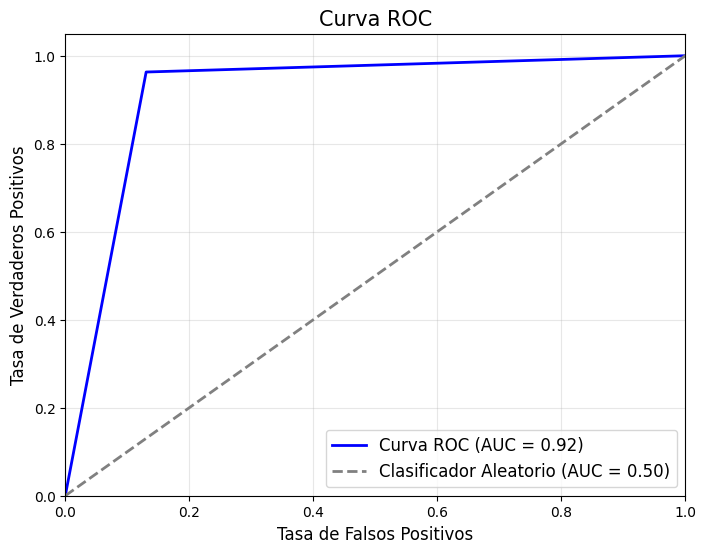

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(df['y_real'], df['y_pred'])
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Clasificador Aleatorio (AUC = 0.50)')

# Configurar límites y etiquetas
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos', fontsize=12)
plt.title('Curva ROC', fontsize=15)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)

# Mostrar la gráfica
plt.show()


Un **AUC** de 0.92 indica que el modelo tiene un rendimiento excelente para distinguir entre clases. Esto significa que el modelo tiene un 92% de probabilidad de clasificar correctamente una instancia positiva. 

Cuanto más cercano esté el AUC a 1.0, mejor es el modelo. Un AUC de 0.5, en cambio, indica que el modelo no tiene capacidad predictiva y está adivinando al azar.

## Referencias


- [Scikit-learn: Error Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) - La documentación oficial de Scikit-learn proporciona ejemplos de cómo calcular métricas de error como MAE, MSE y RMSE.

- [Wikipedia: Matriz de Confusión](https://es.wikipedia.org/wiki/Matriz_de_confusi%C3%B3n) - Un artículo introductorio que explica los conceptos de TP, FP, TN y FN.

- [Scikit-learn: ROC Curve](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html) - Ejemplos prácticos sobre cómo calcular y graficar la curva ROC y AUC para modelos de clasificación.

- [Métricas de Clasificación en Python](https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234) - Un artículo simple que cubre las métricas de evaluación como Accuracy, Recall, Precision y F1-Score.

- [Documentación de Scikit-learn: train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) - Explicación detallada y ejemplos de cómo dividir los datos en conjuntos de entrenamiento y prueba.

- [Machine Learning Mastery: ROC Curves and AUC](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/) - Explicación clara y sencilla sobre cómo interpretar la curva ROC y el AUC, con ejemplos en Python.

